In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
dd = pd.read_csv(r"C:\Users\hi\Desktop\Innomatics\Sample Docs for practice\autos_stats.csv", encoding = 'unicode_escape')

## 1) Perform general Data analysis

In [3]:
dd.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
dd.info()          ### Full Information of the Data Set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

#### Duplicates

In [5]:
dd[dd.duplicated()]          

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [6]:
dd.drop_duplicates(inplace = True)      ## Dropping Dulicates

In [7]:
dd[dd.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


#### Missing Values

In [8]:
dd.isna().sum()         ## Identifying Missing values

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [9]:
dd.drop(columns = 'notRepairedDamage', axis = 1, inplace = True )

In [10]:
dd.dropna(axis = 0, inplace = True)

In [11]:
dd.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [12]:
for i in dd:
    print(f"{i}: {dd[i].unique()}")
    print()

dateCrawled: ['2016-03-14 12:52:21' '2016-03-17 16:54:04' '2016-03-31 17:25:20' ...
 '2016-03-19 18:57:12' '2016-03-20 19:41:08' '2016-03-07 19:39:19']

name: ['Jeep_Grand_Cherokee_"Overland"' 'GOLF_4_1_4__3TÜRER'
 'Skoda_Fabia_1.4_TDI_PD_Classic' ...
 'Smart_smart_leistungssteigerung_100ps' 'VW_Golf_Kombi_1_9l_TDI'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']

seller: ['privat' 'gewerblich']

offerType: ['Angebot' 'Gesuch']

price: [ 9800  1500  3600 ...  1559 10985 14989]

abtest: ['test' 'control']

vehicleType: ['suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'coupe' 'andere']

yearOfRegistration: [2004 2001 2008 1995 1980 2014 2005 2011 2007 2009 2002 1997 1990 1981
 2003 1984 2006 1999 1998 2012 2010 2000 1992 1993 2013 1994 1991 1996
 1989 2015 1968 1982 1983 1959 1973 1969 1971 1987 1988 1967 2016 1986
 1985 1965 1945 1974 1979 1955 1978 1976 1972 1977 1961 1966 1975 1970
 1937 1963 1936 1954 1962 1960 1964 1951 1910 1953 1957 1958 1956 2017
 1941 1950 1948 1932 1952 

lastSeen: ['2016-04-05 12:47:46' '2016-03-17 17:40:17' '2016-04-06 10:17:21' ...
 '2016-04-02 18:16:20' '2016-03-19 20:44:43' '2016-03-29 10:17:23']



#### Type Casting

In [13]:
dd['dateCrawled'] = pd.to_datetime(dd["dateCrawled"]).dt.date       
dd['dateCreated'] = pd.to_datetime(dd["dateCreated"]).dt.date
dd['lastSeen'] = pd.to_datetime(dd["lastSeen"]).dt.date

In [14]:
dd['dateCrawled'] = dd['dateCrawled'].astype('datetime64')       
dd['dateCreated'] = dd['dateCreated'].astype('datetime64')
dd['lastSeen'] = dd['lastSeen'].astype('datetime64')
dd["postalCode"] = dd["postalCode"].astype('object')

#### Outliers and Structural errors

In [15]:
yr = dd[(dd['yearOfRegistration'] < 1900) | (dd['yearOfRegistration'] >2023)]

In [16]:
dd.drop(yr.index, inplace = True)

In [17]:
dd['powerPS'] = np.where((dd['powerPS'] < 1) | (dd['powerPS'] >2400), dd['powerPS'].median(), dd['powerPS'] )

In [18]:
dd['monthOfRegistration'] = np.where((dd['monthOfRegistration'] == 0), dd['monthOfRegistration'].mode()[0], dd['monthOfRegistration'] )

In [19]:
dd.drop(dd[(dd['price']==0) | (dd['price']>4000000) | (dd['price']< 500)].index, inplace = True)

In [20]:
dd.to_csv("Used_Car_Analysis")

## 2)Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot.

<Axes: ylabel='Density'>

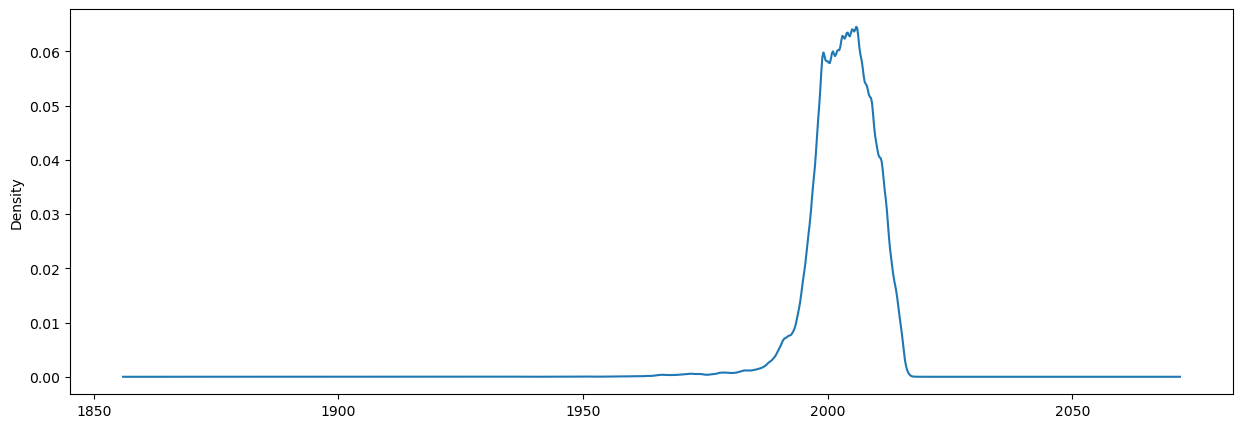

In [21]:
dd['yearOfRegistration'].plot(kind = 'kde', figsize = (15,5))

**The Distribution is left skewed which means most of points are on the right side of the plot. Hence Maximum cars are registered between 2000 and 2020.**

## 3) Create a plot based on the Variation of the price range by the vehicle type


<Axes: xlabel='vehicleType'>

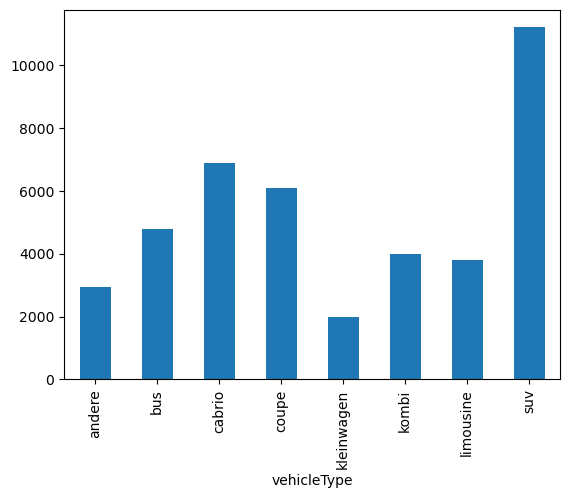

In [23]:
dd.groupby('vehicleType')['price'].median().plot(kind = 'bar')

## 4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

In [24]:
dd['vehicleType'].value_counts()

limousine     82775
kleinwagen    61482
kombi         57952
bus           27072
cabrio        20164
coupe         15840
suv           13080
andere         2192
Name: vehicleType, dtype: int64

<Axes: xlabel='Type of Vehicle ', ylabel='count of vehicles'>

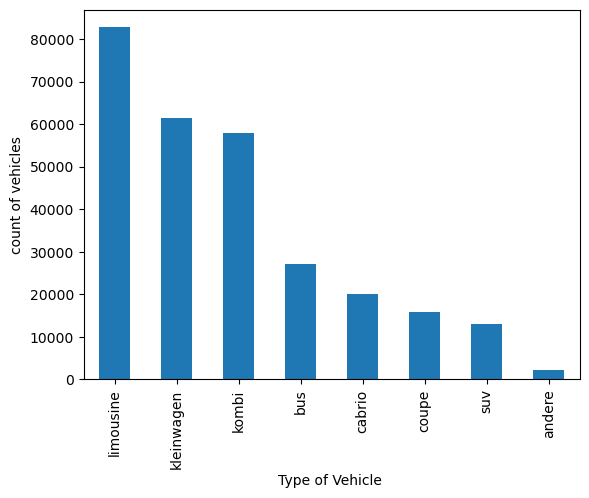

In [25]:
dd['vehicleType'].value_counts().plot(kind = 'bar', xlabel = 'Type of Vehicle ', ylabel = 'count of vehicles')

## 5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

<Axes: xlabel='price', ylabel='kilometer'>

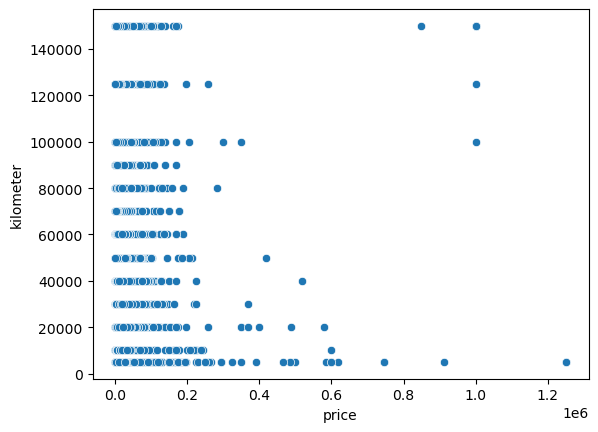

In [26]:
sns.scatterplot(dd, x = 'price' , y = 'kilometer')

There is no Relation between "Price" and "Kilometres" Driven.